In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [16]:
data_agg = pd.read_csv('dataset_aggregated.csv', index_col=0)
data_agg['date'] = pd.to_datetime(data_agg['date'])
data_agg[['screen_sum',
       'call_sum', 'sms_sum', 'appCat.builtin_sum', 'appCat.communication_sum',
       'appCat.entertainment_sum', 'appCat.finance_sum', 'appCat.game_sum',
       'appCat.office_sum', 'appCat.other_sum', 'appCat.social_sum',
       'appCat.travel_sum', 'appCat.unknown_sum', 'appCat.utilities_sum',
       'appCat.weather_sum', 'day', 'month']] = data_agg[['screen_sum',
       'call_sum', 'sms_sum', 'appCat.builtin_sum', 'appCat.communication_sum',
       'appCat.entertainment_sum', 'appCat.finance_sum', 'appCat.game_sum',
       'appCat.office_sum', 'appCat.other_sum', 'appCat.social_sum',
       'appCat.travel_sum', 'appCat.unknown_sum', 'appCat.utilities_sum',
       'appCat.weather_sum', 'day', 'month']].fillna(0)

scaler = MinMaxScaler()
data_agg[['circumplex.arousal_median', 'circumplex.valence_median', 'activity_mean', 'screen_sum',
       'call_sum', 'sms_sum', 'appCat.builtin_sum', 'appCat.communication_sum',
       'appCat.entertainment_sum', 'appCat.finance_sum', 'appCat.game_sum',
       'appCat.office_sum', 'appCat.other_sum', 'appCat.social_sum',
       'appCat.travel_sum', 'appCat.unknown_sum', 'appCat.utilities_sum',
       'appCat.weather_sum', 'day', 'month']] = scaler.fit_transform(data_agg[['circumplex.arousal_median', 'circumplex.valence_median', 'activity_mean', 'screen_sum',
       'call_sum', 'sms_sum', 'appCat.builtin_sum', 'appCat.communication_sum',
       'appCat.entertainment_sum', 'appCat.finance_sum', 'appCat.game_sum',
       'appCat.office_sum', 'appCat.other_sum', 'appCat.social_sum',
       'appCat.travel_sum', 'appCat.unknown_sum', 'appCat.utilities_sum',
       'appCat.weather_sum', 'day', 'month']])

scaler_target = MinMaxScaler()
data_agg[['mood_mean']] = scaler_target.fit_transform(data_agg[['mood_mean']])

data_agg

,id,date,mood_mean,circumplex.arousal_median,circumplex.valence_median,activity_mean,screen_sum,call_sum,sms_sum,appCat.builtin_sum,...,appCat.game_sum,appCat.office_sum,appCat.other_sum,appCat.social_sum,appCat.travel_sum,appCat.unknown_sum,appCat.utilities_sum,appCat.weather_sum,day,month
1309,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,0.000000,0.064516,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
1310,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,0.000000,0.032258,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.00
1311,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,0.000000,0.225806,0.117647,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.00
1312,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,0.000000,0.064516,0.176471,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.00
1886,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,0.000000,0.000000,0.058824,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,AS14.33,2014-05-27,0.3000,0.50,0.50,0.025408,0.218557,0.032258,0.117647,0.126255,...,0.0,0.000000,0.056557,0.096066,0.000000,0.000000,0.031205,0.0,0.166667,0.75
1260,AS14.33,2014-05-28,0.6875,0.50,0.50,0.206602,0.441570,0.322581,0.058824,0.443402,...,0.0,0.084547,0.210055,0.212468,0.000000,0.000000,0.017036,0.0,0.333333,0.75
1261,AS14.33,2014-05-29,0.5000,NaN,0.50,0.299088,0.036600,0.161290,0.058824,0.069531,...,0.0,0.000000,0.011575,0.085532,0.000494,0.000000,0.001777,0.0,0.500000,0.75
1262,AS14.33,2014-05-30,0.4500,0.25,0.25,0.284091,0.565233,0.129032,0.000000,0.529089,...,0.0,0.000000,0.020853,0.151309,0.554245,0.004927,0.129339,0.0,0.666667,0.75


### Create datasets

In [30]:
# loop over IDs
IDs = data_agg.id.unique()

data_in = {}
data_out = {}
data_out_class = {}
meta_data = {}

window = 5

count_nan_X = 0
count_nan_Y = 0

for ID in IDs:

    data_in_list = []
    data_out_list = []
    data_out_class_list = []
    meta_data_list = []

    data_id = data_agg[data_agg['id']==ID]
    
    # make sure all consecutive dates are in dataset
    start = data_id['date'].min()
    end = data_id['date'].max()
    dates = pd.DataFrame({'date': pd.date_range(start=start, end=end), 'id':ID})

    data_id = pd.merge(dates, data_id, on=['date', 'id'], how='left')#, 'day', 'month'])

    # use rolling window to find first 4 consecutive non-null values
    mask = data_id['mood_mean'].rolling(4).apply(lambda x: x.notnull().all()).fillna(False).astype(bool)
    idx = mask.index[mask].min()
    data_id = data_id.iloc[idx-3:]

    # try to fill na values using interpolation
    data_id.iloc[:, 2:] = data_id.iloc[:, 2:].interpolate(method='linear', limit=3, axis=0, limit_direction='both')

    for i in range(window, len(data_id)):

        meta = np.array(data_id.iloc[i, 0:2])
        X = np.array(data_id.iloc[i - window:i, 2:])

        # target for numerical prediction
        Y = data_id.iloc[i, 2]

        # skip data if Y is nan
        if np.isnan(Y):
            count_nan_Y += 1
            continue

        # skip data if nan values in X
        if (np.isnan(X)).any():
            count_nan_X += 1
            continue

        # target for classification
        Y_int = int(np.rint(scaler_target.inverse_transform([[Y]])))
        n_values = 5
        Y_class = np.eye(n_values)[Y_int-5]

        data_in_list.append(X)
        data_out_list.append(Y)
        data_out_class_list.append(Y_class)
        meta_data_list.append(meta)

    data_in[ID] = np.array(data_in_list)
    data_out[ID] = np.array(data_out_list)
    data_out_class[ID] = np.array(data_out_class_list)
    meta_data[ID] = np.array(meta_data_list)

print(data_in[ID].shape)
print(data_out[ID].shape)
print('Rows deleted because of nan values in target: ', count_nan_Y)
print('Rows deleted because of nan values in input: ', count_nan_X)


(41, 5, 21)
(41,)
Rows deleted because of nan values in target:  1
Rows deleted because of nan values in input:  65


In [31]:
print('Total number of data points: ', np.sum([len(data_in[ID]) for ID in data_in.keys()]))

Total number of data points:  1106


### Numerical prediction

In [32]:
# split into train and test data
split_dataset = {}
for ID in data_in.keys():

    split_dataset[ID] = {}
    
    # split into training and test set
    X_train, X_test, Y_train, Y_test, meta_train, meta_test = train_test_split(data_in[ID], data_out[ID], meta_data[ID], test_size=0.15, shuffle=False, random_state=42)
    X_train, X_val, Y_train, Y_val, meta_train, meta_val = train_test_split(X_train, Y_train, meta_train, test_size=0.15/0.85, shuffle=False, random_state=42)
    split_dataset[ID]['X_train'] = X_train
    split_dataset[ID]['Y_train'] = Y_train
    split_dataset[ID]['meta_train'] = meta_train
    split_dataset[ID]['X_test'] = X_test
    split_dataset[ID]['Y_test'] = Y_test
    split_dataset[ID]['meta_test'] = meta_test
    split_dataset[ID]['X_val'] = X_val
    split_dataset[ID]['Y_val'] = Y_val
    split_dataset[ID]['meta_val'] = meta_val

print(split_dataset[ID]['X_train'].shape)
print(split_dataset[ID]['X_val'].shape)
print(split_dataset[ID]['X_test'].shape)

(28, 5, 21)
(6, 5, 21)
(7, 5, 21)


In [33]:
print('Sanity check')
print()
id = 'AS14.01'
idx = 3
print('date, ID, mood: ', [split_dataset[id]['meta_train'][idx][0], split_dataset[id]['meta_train'][idx][1], split_dataset[id]['Y_train'][idx]])
print('Mood on previous day: ', split_dataset[id]['Y_train'][idx - 1])
print('Mood on second to last day: ', split_dataset[id]['Y_train'][idx - 2])
print()
print('Moods in input data: ', split_dataset[id]['X_train'][idx][:,0])
print('Mood in target data: ', split_dataset[id]['Y_train'][idx])

Sanity check

date, ID, mood:  [Timestamp('2014-03-29 00:00:00'), 'AS14.01', 0.75]
Mood on previous day:  0.3500000000000001
Mood on second to last day:  0.5

Moods in input data:  [0.25   0.4375 0.4    0.5    0.35  ]
Mood in target data:  0.75


In [38]:
Y_test_num_pred = []
Y_test_num_actual = []
df_pred = pd.DataFrame()

for ID in split_dataset.keys():

    print(ID)

    # create the LSTM network for numerical prediction
    model_num = Sequential()
    model_num.add(LSTM(128, input_shape=(window, data_in[ID].shape[2]), activation='relu', return_sequences=True))
    model_num.add(Dropout(0.2))
    model_num.add(LSTM(128, input_shape=(window, data_in[ID].shape[2]), activation='relu'))
    model_num.add(Dropout(0.2))
    model_num.add(Dense(1, activation='sigmoid'))
    model_num.compile(loss='mean_absolute_error', optimizer='adam')

    data = split_dataset[ID]
        
    model_num.fit(data['X_train'], 
                data['Y_train'],
                validation_data = (data['X_val'], data['Y_val']),
                epochs=50,
                batch_size=len(data['X_train']),
                verbose=0)
    
    # get predictions
    predictions =  model_num.predict(data['X_test'], verbose=0)
    predictions = scaler_target.inverse_transform(predictions)
    # print(predictions)
    Y_test_num_pred = Y_test_num_pred + list(predictions)

    # get actual values
    actuals = scaler_target.inverse_transform([data['Y_test']])[0]
    # print(actuals)
    Y_test_num_actual = Y_test_num_actual + list(actuals)
    
    predictions = model_num.predict(data['X_train'], verbose=0)
    predictions = scaler_target.inverse_transform(predictions)
    actuals = scaler_target.inverse_transform([data['Y_train']])

    df = pd.DataFrame({'id':data['meta_train'][:,1], 'date':data['meta_train'][:,0], 'actual':actuals[0], 'predicted':predictions[:,0], 'test':0})
    df_pred = pd.concat([df_pred, df])

    predictions = model_num.predict(data['X_test'], verbose=0)
    predictions = scaler_target.inverse_transform(predictions)
    actuals = scaler_target.inverse_transform([data['Y_test']])

    df = pd.DataFrame({'id':data['meta_test'][:,1], 'date':data['meta_test'][:,0], 'actual':actuals[0], 'predicted':predictions[:,0], 'test':1})
    df_pred = pd.concat([df_pred, df])

    predictions = model_num.predict(data['X_val'], verbose=0)
    predictions = scaler_target.inverse_transform(predictions)
    actuals = scaler_target.inverse_transform([data['Y_val']])

    df = pd.DataFrame({'id':data['meta_val'][:,1], 'date':data['meta_val'][:,0], 'actual':actuals[0], 'predicted':predictions[:,0], 'test':0.5})
    df_pred = pd.concat([df_pred, df])


AS14.01
AS14.02
AS14.03
AS14.05
AS14.06
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.24
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31
AS14.32
AS14.33


In [39]:
result = mean_squared_error(Y_test_num_actual, Y_test_num_pred)
print(result)

0.4349571253974883


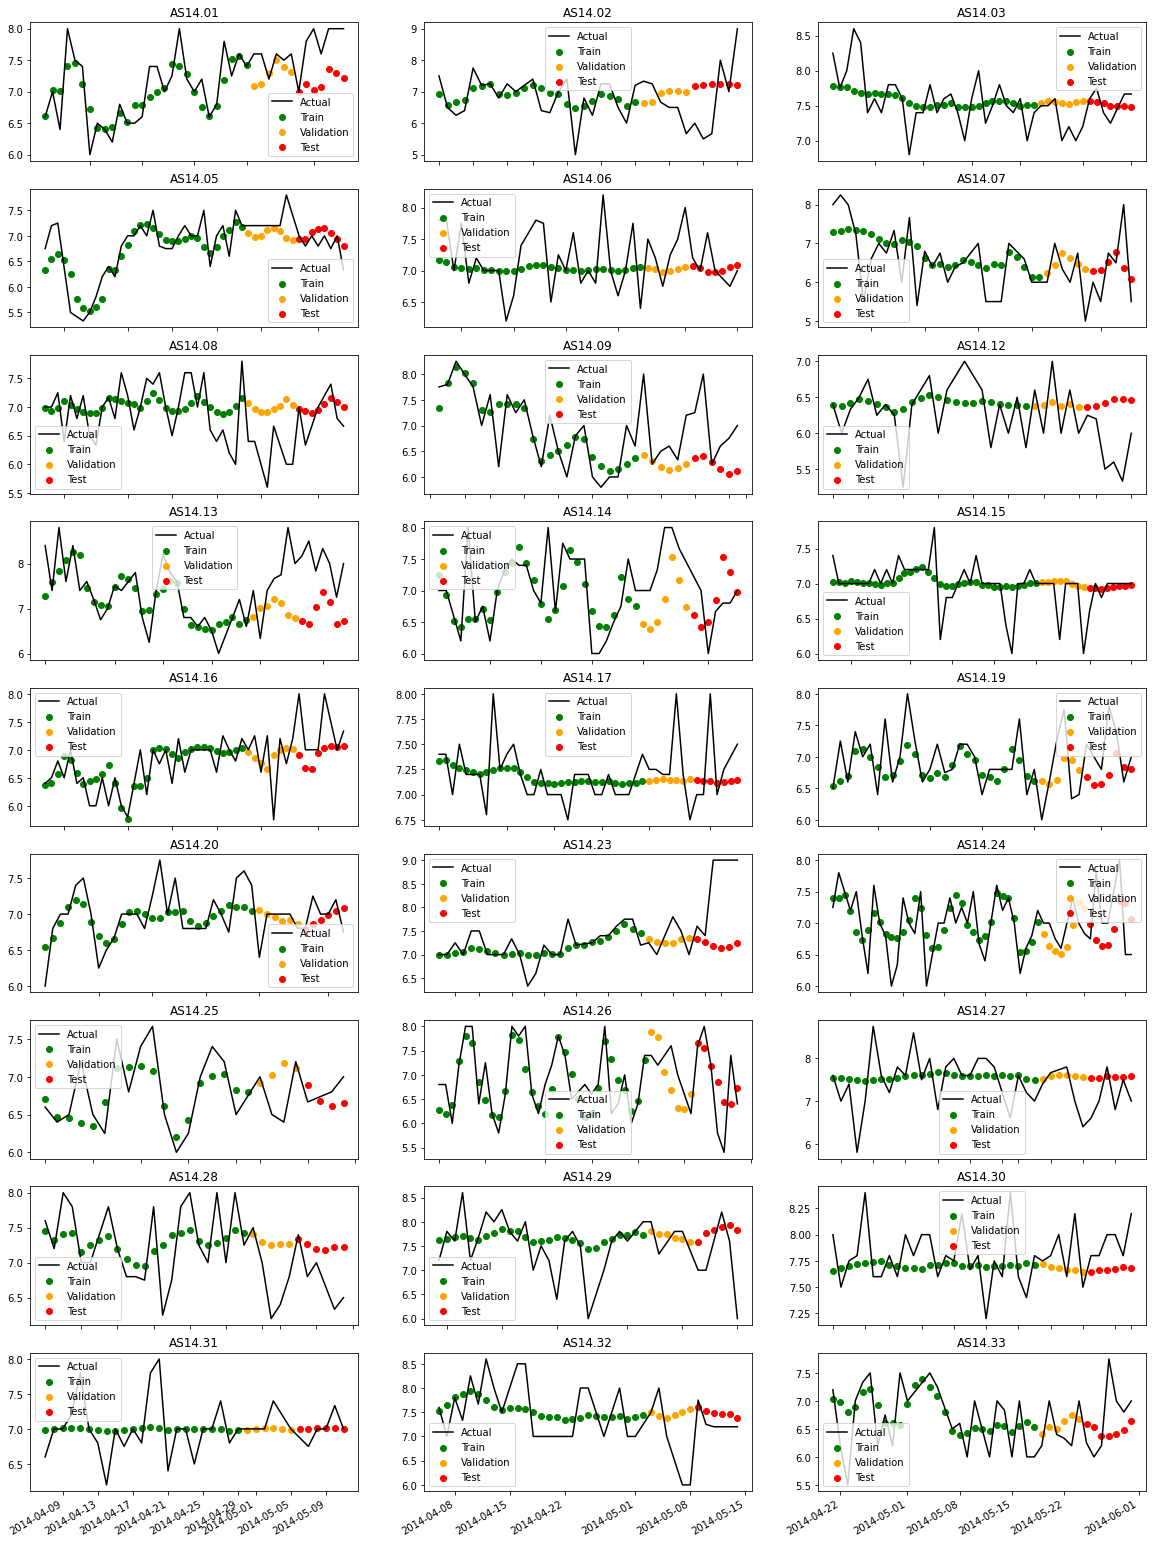

In [41]:
fig = plt.figure(figsize=(20,30))

IDs = split_dataset.keys()

df_pred = df_pred.sort_values(['id', 'date'])

for i, ID in enumerate(IDs):
    pred_id = df_pred[df_pred['id']==ID]
    pred_id_train = pred_id[pred_id['test']==0]
    pred_id_val = pred_id[pred_id['test']==0.5]
    pred_id_test = pred_id[pred_id['test']==1]

    ax = fig.add_subplot(9,3, i+1)
    ax.plot(pred_id['date'], pred_id['actual'], color='k', linestyle='-', label='Actual')
    ax.scatter(pred_id_train['date'], pred_id_train['predicted'], color='g', label='Train')
    ax.scatter(pred_id_val['date'], pred_id_val['predicted'], color='orange', label='Validation')
    ax.scatter(pred_id_test['date'], pred_id_test['predicted'], color='r', label='Test')
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title(f'{ID}')

plt.show()

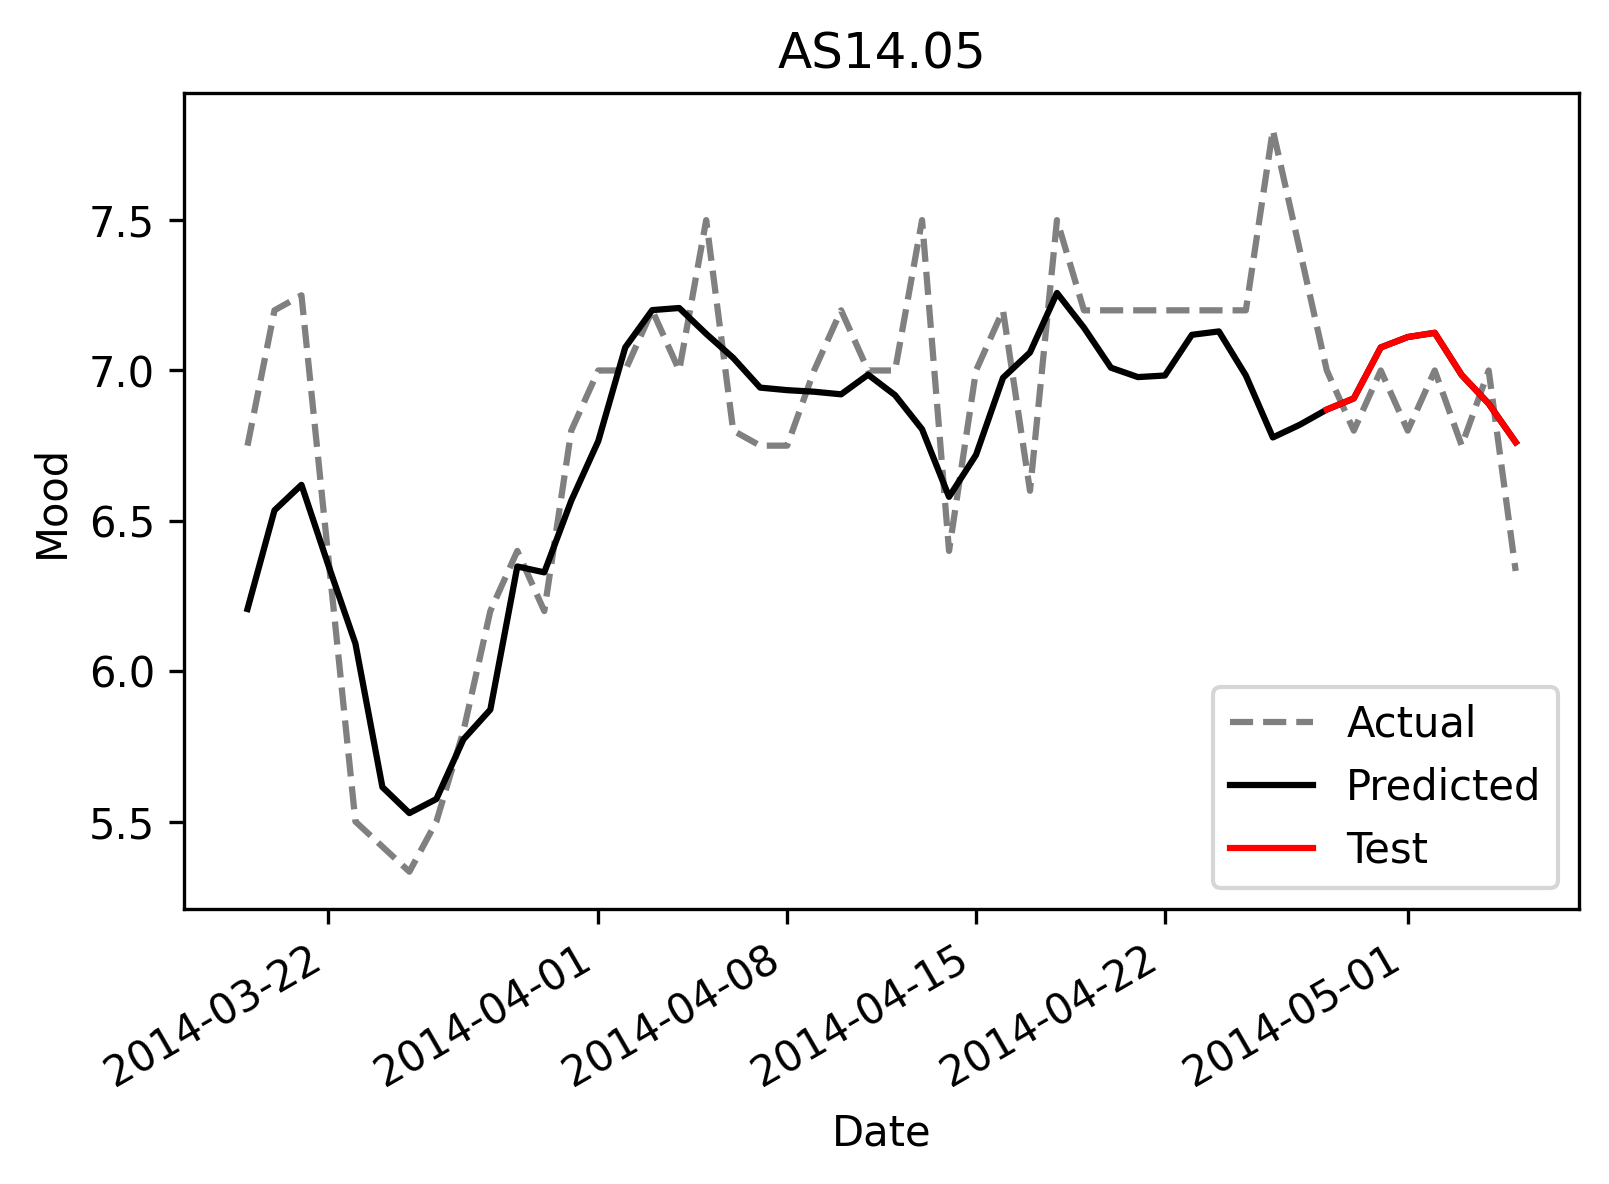

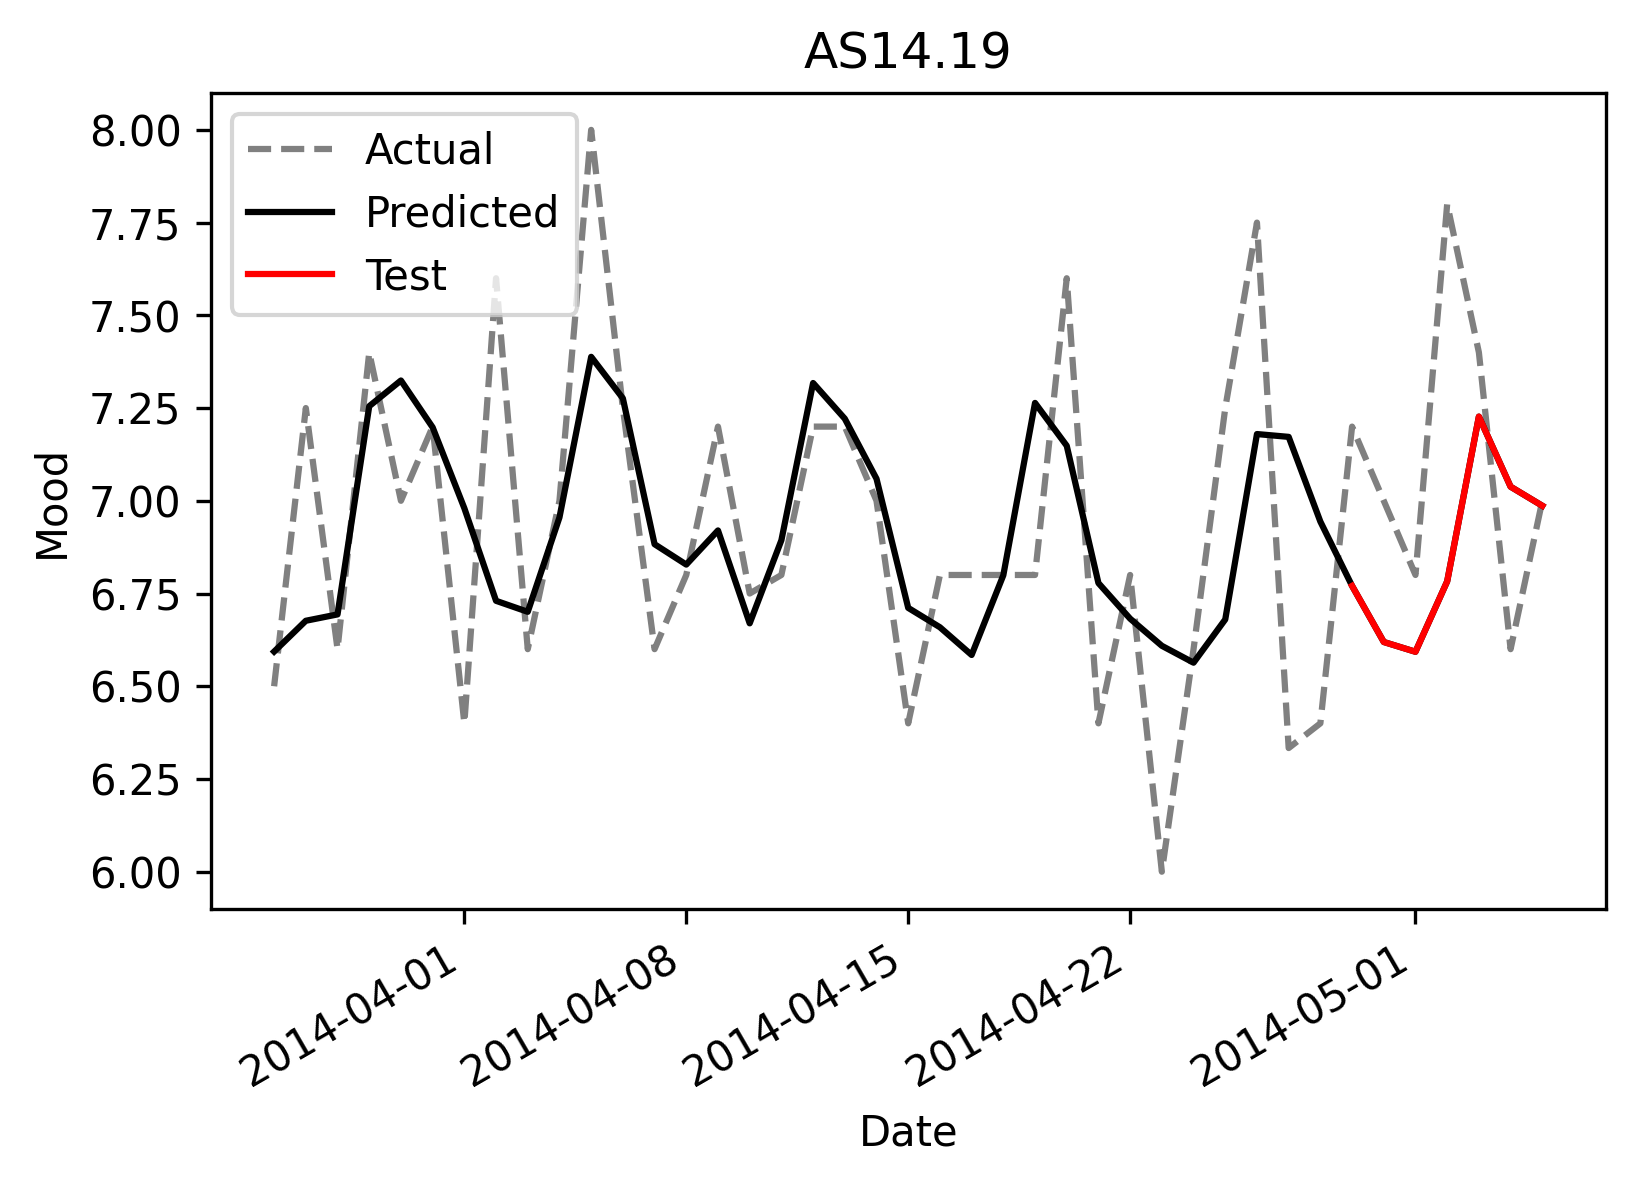

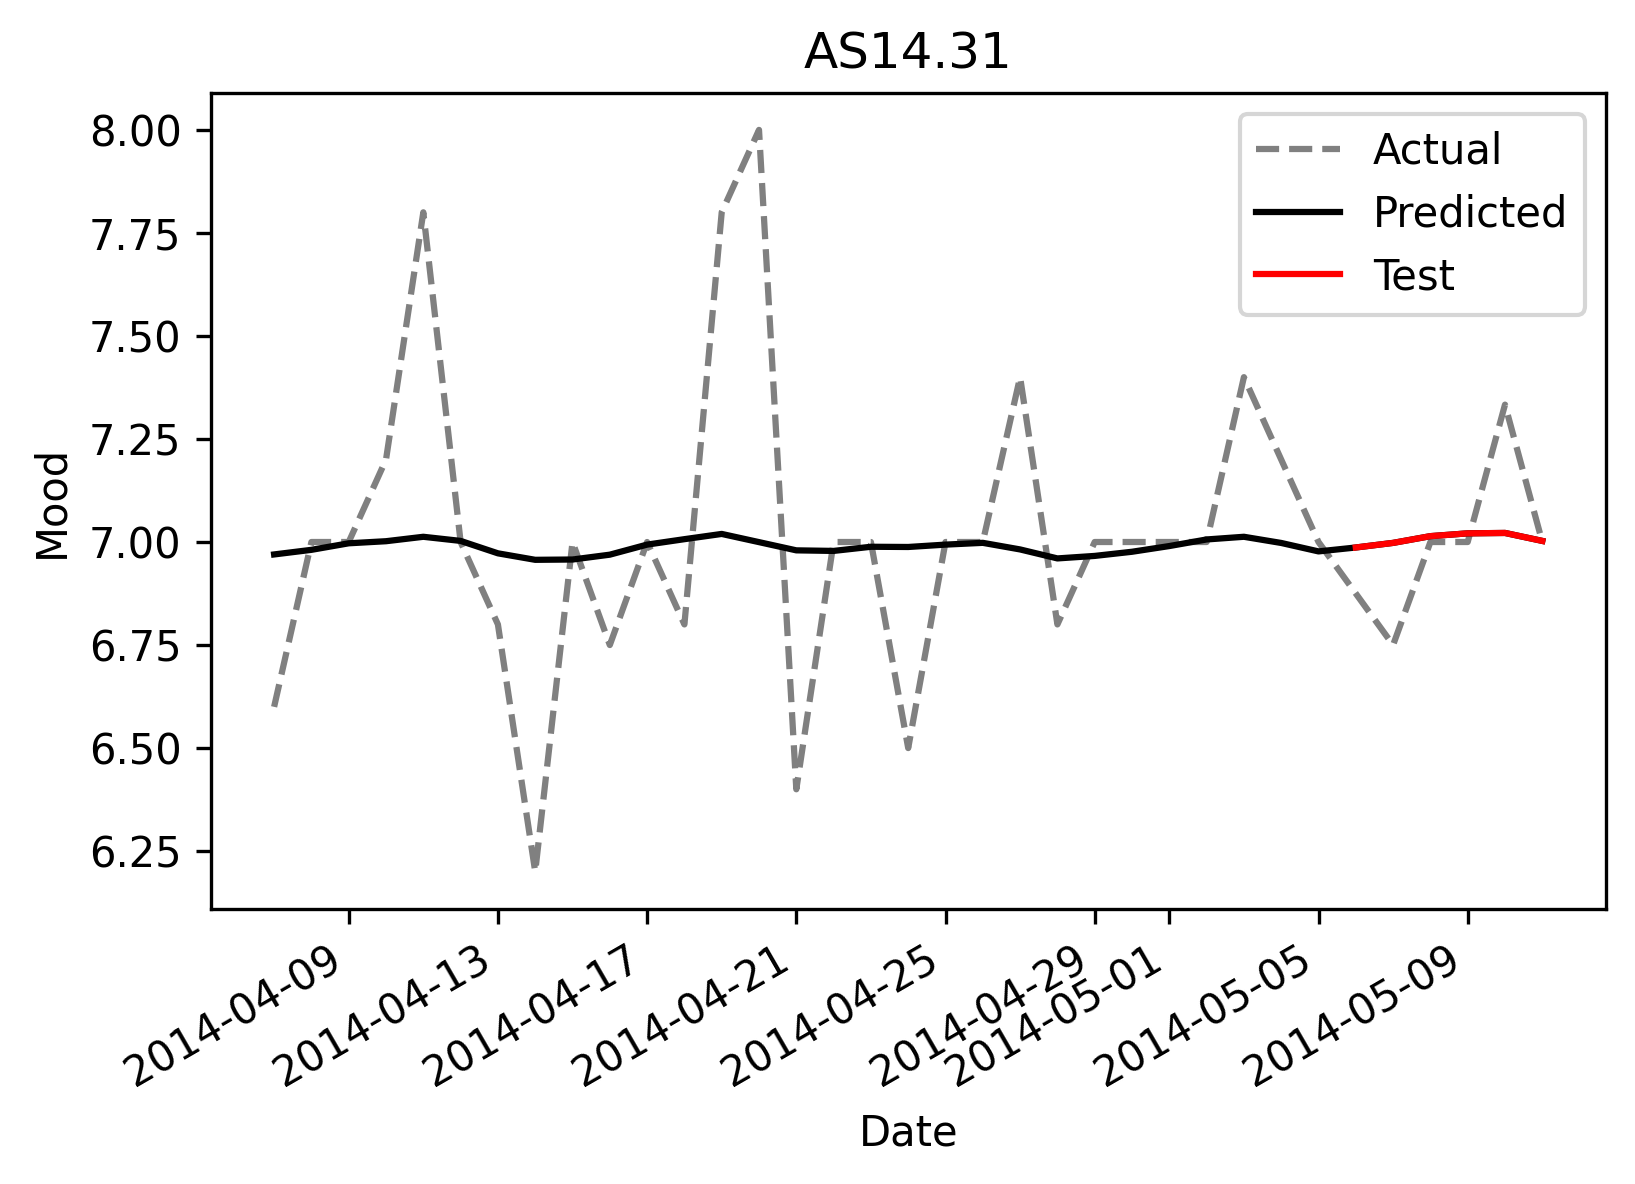

In [37]:
IDs = ['AS14.05', 'AS14.19', 'AS14.31']

for ID in IDs:
    pred_id = df_pred[df_pred['id']==ID]
    pred_id_train = pred_id[pred_id['test']==0]
    pred_id_val = pred_id[pred_id['test']==0.5]
    pred_id_test = pred_id[pred_id['test']==1]

    fig = plt.figure(figsize=(6,4), dpi=300)
    plt.plot(pred_id['date'], pred_id['actual'], color='gray', linestyle='--', label='Actual')
    plt.plot(pred_id['date'], pred_id['predicted'], color='k', label='Predicted')
    # plt.scatter(pred_id_train['date'], pred_id_train['predicted'], color='g', label='Train')
    # plt.scatter(pred_id_val['date'], pred_id_val['predicted'], color='orange', label='Validation')
    plt.plot(pred_id_test['date'], pred_id_test['predicted'], color='r', label='Test')
    plt.xlabel('Date')
    plt.ylabel('Mood')
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title(f'{ID}')
    plt.savefig(f'plots/ts_num_mae_{ID}.png', bbox_inches='tight')
    plt.show()

### Classification

In [26]:
# split into train and test data
split_dataset = {}
for ID in data_in.keys():

    split_dataset[ID] = {}
    
    # split into training and test set
    X_train, X_test, Y_train, Y_test, meta_train, meta_test = train_test_split(data_in[ID], data_out_class[ID], meta_data[ID], test_size=0.15, shuffle=False, random_state=42)
    X_train, X_val, Y_train, Y_val, meta_train, meta_val = train_test_split(X_train, Y_train, meta_train, test_size=0.15/0.85, shuffle=False, random_state=42)
    split_dataset[ID]['X_train'] = X_train
    split_dataset[ID]['Y_train'] = Y_train
    split_dataset[ID]['meta_train'] = meta_train
    split_dataset[ID]['X_test'] = X_test
    split_dataset[ID]['Y_test'] = Y_test
    split_dataset[ID]['meta_test'] = meta_test
    split_dataset[ID]['X_val'] = X_val
    split_dataset[ID]['Y_val'] = Y_val
    split_dataset[ID]['meta_val'] = meta_val

print(split_dataset[ID]['X_train'].shape)
print(split_dataset[ID]['X_val'].shape)
print(split_dataset[ID]['X_test'].shape)

(32, 5, 21)
(4, 5, 21)
(5, 5, 21)


In [27]:
Y_test_class_pred = []
Y_test_class_actual = []
df_pred = pd.DataFrame()

for ID in split_dataset.keys():

    print(ID)

    # create the LSTM network for classification
    model_class = Sequential()
    model_class.add(LSTM(128, input_shape=(window, data_in[ID].shape[2]), activation='relu', return_sequences=True))
    model_class.add(Dropout(0.3))
    model_class.add(LSTM(128, input_shape=(window, data_in[ID].shape[2]), activation='relu'))
    model_class.add(Dropout(0.3))
    model_class.add(Dense(5, activation='softmax'))
    model_class.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

    data = split_dataset[ID]
        
    model_class.fit(data['X_train'], 
                data['Y_train'],
                validation_data = (data['X_val'], data['Y_val']),
                epochs=100,
                batch_size=len(data['X_train']),
                verbose=0)
    
    # get predictions
    predictions =  model_class.predict(data['X_test'], verbose=0)
    predictions = predictions.argmax(axis=1) + 5
    # print(predictions)
    Y_test_class_pred = Y_test_class_pred + list(predictions)

    # get actual values
    actuals = data['Y_test'].argmax(axis=1) + 5
    # print(actuals)
    Y_test_class_actual = Y_test_class_actual + list(actuals)
    
    predictions = model_class.predict(data['X_train'], verbose=0)
    predictions = predictions = predictions.argmax(axis=1) + 5
    actuals = data['Y_train'].argmax(axis=1) + 5

    df = pd.DataFrame({'id':data['meta_train'][:,1], 'date':data['meta_train'][:,0], 'actual':actuals, 'predicted':predictions, 'test':0})
    df_pred = pd.concat([df_pred, df])

    predictions = model_class.predict(data['X_test'], verbose=0)
    predictions = predictions = predictions.argmax(axis=1) + 5
    actuals = data['Y_test'].argmax(axis=1) + 5

    df = pd.DataFrame({'id':data['meta_test'][:,1], 'date':data['meta_test'][:,0], 'actual':actuals, 'predicted':predictions, 'test':1})
    df_pred = pd.concat([df_pred, df])

    predictions = model_class.predict(data['X_val'], verbose=0)
    predictions = predictions = predictions.argmax(axis=1) + 5
    actuals = data['Y_val'].argmax(axis=1) + 5

    df = pd.DataFrame({'id':data['meta_val'][:,1], 'date':data['meta_val'][:,0], 'actual':actuals, 'predicted':predictions, 'test':0.5})
    df_pred = pd.concat([df_pred, df])


AS14.01
AS14.02
AS14.03
AS14.05
AS14.06
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.24
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31
AS14.32
AS14.33


In [28]:
total_accuracy = (np.array(Y_test_class_pred) == np.array(Y_test_class_actual)).sum() / len(Y_test_class_actual)
print('Accuracy: ', total_accuracy)

Accuracy:  0.5365853658536586


In [243]:
df_pred.to_csv('ts_classification.csv')

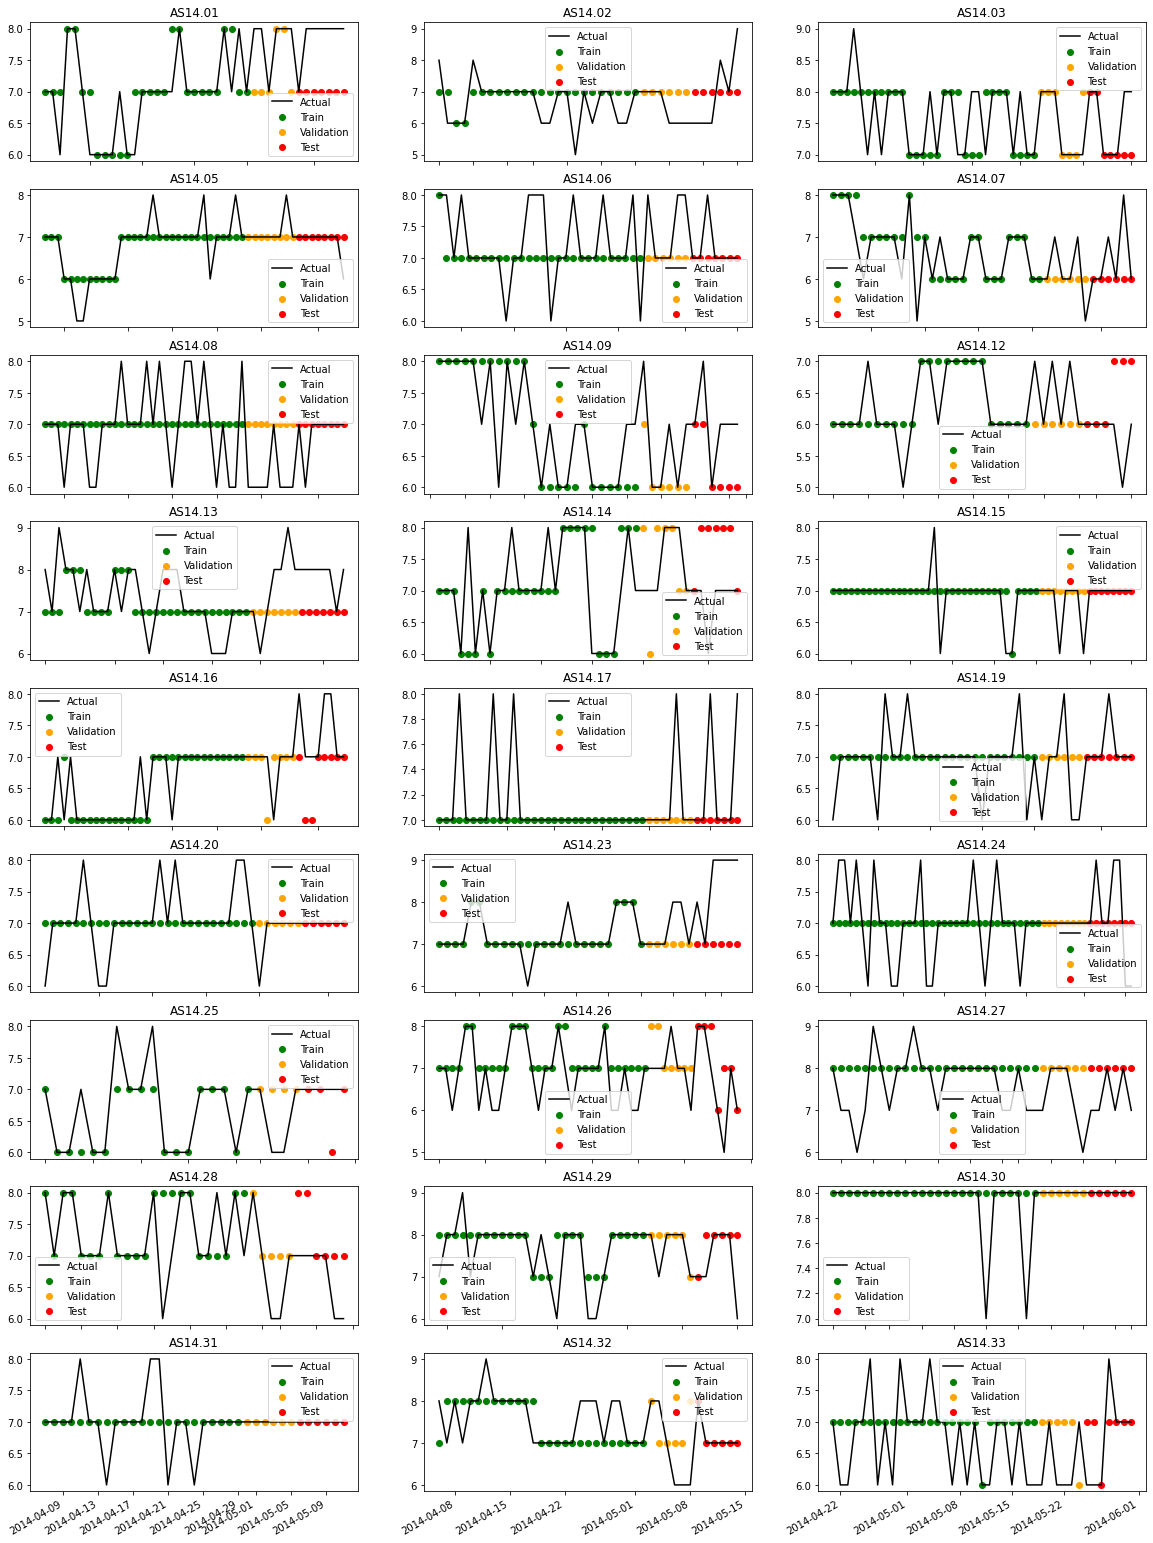

In [241]:
IDs = df_pred.id.unique()

fig = plt.figure(figsize=(20,30))

df_pred = df_pred.sort_values(['id', 'date'])

for i, ID in enumerate(IDs):
    pred_id = df_pred[df_pred['id']==ID]
    pred_id_train = pred_id[pred_id['test']==0]
    pred_id_val = pred_id[pred_id['test']==0.5]
    pred_id_test = pred_id[pred_id['test']==1]

    ax = fig.add_subplot(9,3, i+1)
    ax.plot(pred_id['date'], pred_id['actual'], color='k', linestyle='-', label='Actual')
    ax.scatter(pred_id_train['date'], pred_id_train['predicted'], color='g', label='Train')
    ax.scatter(pred_id_val['date'], pred_id_val['predicted'], color='orange', label='Validation')
    ax.scatter(pred_id_test['date'], pred_id_test['predicted'], color='r', label='Test')
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title(f'{ID}')

plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

df_pred = pd.read_csv('ts_classification.csv', index_col=0)
Y_test_class_actual = df_pred[df_pred['test']==1]['actual']
Y_test_class_pred = df_pred[df_pred['test']==1]['predicted']

conf_matrix = confusion_matrix(Y_test_class_actual, Y_test_class_pred)
df = pd.DataFrame(conf_matrix, columns=[5, 6, 7, 8, 9], index=[5, 6, 7, 8, 9])

cm = sns.light_palette("red", as_cmap=True)
df.style\
    .background_gradient(cmap=cm, axis=1)\
    .set_precision(0)

C:\Users\mylen\AppData\Local\Temp\ipykernel_31684\2356065473.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(0)


,5,6,7,8,9
5,0,0,2,0,0
6,0,11,13,2,0
7,0,7,82,12,0
8,0,1,28,16,0
9,0,0,5,0,0
